# 1. EDA

In [34]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns
from ydata_profiling import ProfileReport
from scipy import stats
from scipy import special

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

df_train = pd.read_csv("train_test_submission/train.csv")
df_train_Id = df_train["Id"]
df_train = df_train.drop("Id", axis=1)

df_test = pd.read_csv("train_test_submission/test.csv")
df_test_Id = df_test["Id"]
df_test = df_test.drop("Id", axis=1)

df_all_data = pd.concat([df_train, df_test])

print(f"df_train.shape: {df_train.shape}")
display(df_train.head(5))
print(f"df_train.shape: {df_test.shape}")
display(df_test.head(5))

print("-" * 10, "df_train.info()", "-" * 10)
print(df_train.info())
print("\n", "-" * 10, "df_test.info()", "-" * 10)
print(df_test.info())



# # ydata_profilingを使う場合。時間かかるので注意

# if not os.path.exists("ydata_profiling"):
#     os.makedirs("ydata_profiling")

# profile = ProfileReport(df_all_data, minimal=True)
# profile.to_file("ydata_profiling/kaggle_houseprices_minimal.html")

# # profile = ProfileReport(df_all_data, minimal=False)
# # profile.to_file("ydata_profiling/kaggle_houseprices.html")

df_train.shape: (1460, 80)


MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave   NaN      Reg   
1          20       RL         80.0     9600   Pave   NaN      Reg   
2          60       RL         68.0    11250   Pave   NaN      IR1   
3          70       RL         60.0     9550   Pave   NaN      IR1   
4          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd             7        Typ           

df_train.shape: (1459, 79)


MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          20       RH         80.0    11622   Pave   NaN      Reg   
1          20       RL         81.0    14267   Pave   NaN      IR1   
2          60       RL         74.0    13830   Pave   NaN      IR1   
3          60       RL         78.0     9978   Pave   NaN      IR1   
4         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            5            6       1961   
1       Norm     1Fam     1Story            6            6       1958   
2       Norm     1Fam     2Story            5            5       1997   
3       Norm     1Fam     2Story            6            6       1998   
4       Norm   TwnhsE     1Story            8            5       1992   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1961     Gable  CompShg     VinylSd     VinylSd        NaN   
1          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2          1998     Gable  CompShg     VinylSd     VinylSd        NaN   
3          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4          1992     Gable  CompShg     HdBoard     HdBoard        NaN   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       TA       TA           No   
1       108.0        TA        TA     CBlock       TA       TA           No   
2         0.0        TA        TA      PConc       Gd       TA           No   
3        20.0        TA        TA      PConc       TA       TA           No   
4         0.0        Gd        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          Rec       468.0          LwQ       144.0      270.0        882.0   
1          ALQ       923.0          Unf         0.0      406.0       1329.0   
2          GLQ       791.0          Unf         0.0      137.0        928.0   
3          GLQ       602.0          Unf         0.0      324.0        926.0   
4          ALQ       263.0          Unf         0.0     1017.0       1280.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       896         0             0   
1    GasA        TA          Y      SBrkr      1329         0             0   
2    GasA        Gd          Y      SBrkr       928       701             0   
3    GasA        Ex          Y      SBrkr       926       678             0   
4    GasA        Ex          Y      SBrkr      1280         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        896           0.0           0.0         1         0             2   
1       1329           0.0           0.0         1         1             3   
2       1629           0.0           0.0         2         1             3   
3       1604           0.0           0.0         2         1             3   
4       1280           0.0           0.0         2         0             2   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           0         NaN   
1             1          Gd             6        Typ           0         NaN   
2             1          TA             6        Typ           1          TA   
3             1          Gd             7        Typ           

---------- df_train.info() ----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond   

In [35]:
print("-" * 10, "df_train.columns", "-" * 10)
print(df_train.columns)

---------- df_train.columns ----------
Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',

---------- df_train["SalePrice"].describe() ----------
count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


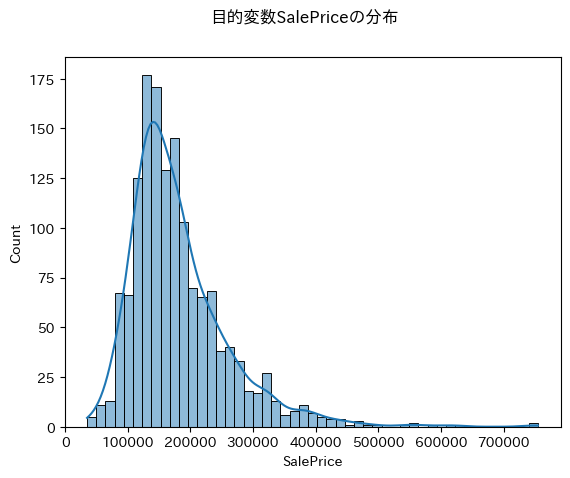

In [36]:
print("-" * 10, 'df_train["SalePrice"].describe()', "-" * 10)
print(df_train["SalePrice"].describe())

# SalePriceの分布
sns.histplot(df_train["SalePrice"], kde=True)
plt.suptitle("目的変数SalePriceの分布")
plt.show()

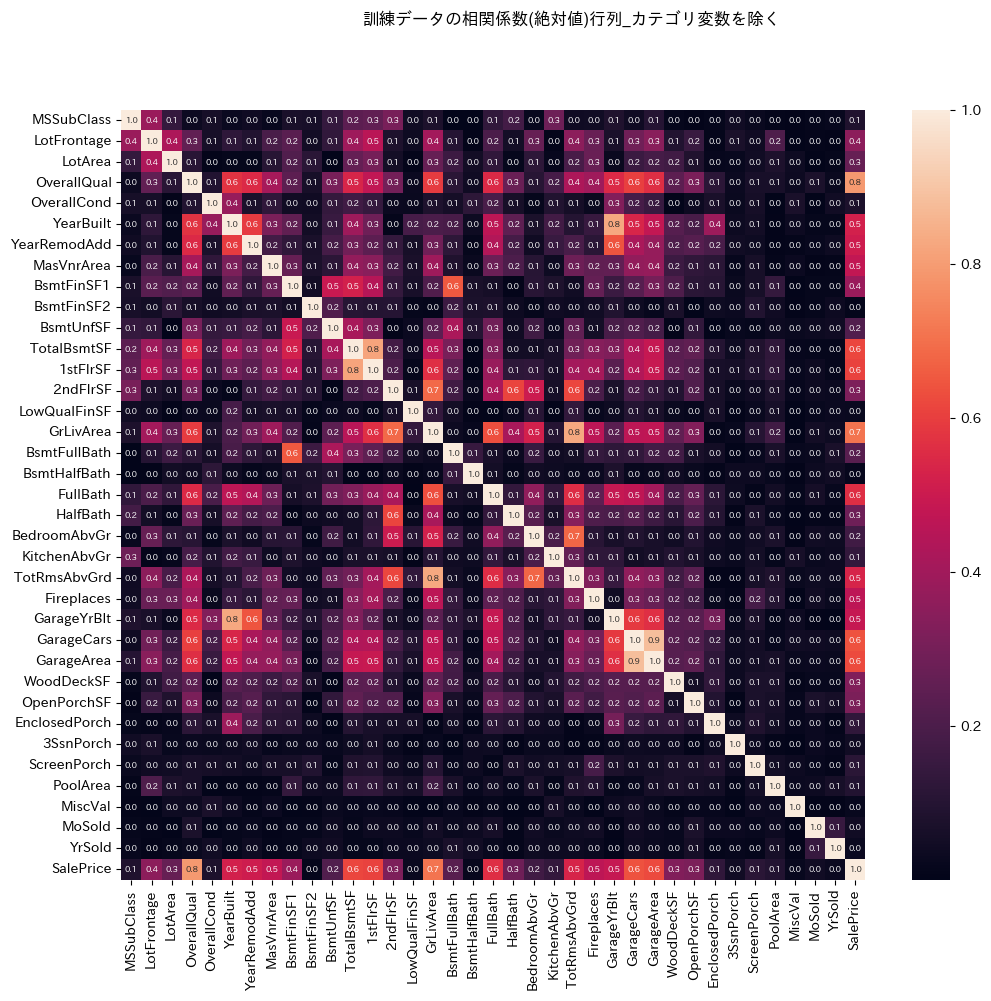

In [37]:
corr_matrix = df_train.corr(numeric_only=True)
"""
    訓練データdf_trainの相関係数行列
    corr_matrix = df_train.corr(numeric_only=True)
"""

plt.figure(figsize=(12, 10))
sns.heatmap(abs(corr_matrix), annot=True, fmt=".1f", annot_kws={"fontsize": 6})

plt.suptitle("訓練データの相関係数(絶対値)行列_カテゴリ変数を除く")
plt.show()

In [38]:
# plotly版。インデックス番号が一目で確認できる

import plotly.express as px
import plotly.subplots as sp

threshold = 0.6
high_corr_cols = (
    corr_matrix["SalePrice"][abs(corr_matrix["SalePrice"]) >= threshold]
    .sort_values(ascending=False)
    .index
).drop("SalePrice")

# プロットのサイズを指定
num_cols = len(high_corr_cols)
rows = num_cols // 3 + 1  # 行数
cols = 3  # 列数

# サブプロットの作成
fig = sp.make_subplots(
    rows=rows, 
    cols=cols, 
    subplot_titles=[f"{col} vs SalePrice （相関係数{corr_matrix["SalePrice"][col]:.3f}）" for col in high_corr_cols],
    horizontal_spacing=0.05,
    vertical_spacing=0.1,
    )

# high_corr_colsにある特徴量ごとに散布図を描く
for i, col in enumerate(high_corr_cols):
    row = i // cols + 1
    col_num = i % cols + 1
    scatter = px.scatter(df_train, x=col, y="SalePrice", opacity=0.3, hover_data=[df_train.index])
    for trace in scatter.data:
        fig.add_trace(trace, row=row, col=col_num)
    fig.update_annotations()

# グラフのタイトルを設定
fig.update_layout(
    title_text=f"SalePriceとの相関係数の絶対値が{threshold}以上の特徴量についての散布図",
    showlegend=False,
    height=400 * rows,
    width=1200,
)

# グラフの表示
fig.show()

# レイアウト調節 https://data-analytics.fun/2021/06/19/plotly-subplots/

# 2. 前処理

In [39]:
# 外れ値処理(訓練データ)
# 外れ値のインデックス番号は、plotlyで描いたグラフから得た
df_train_befdrop = df_train
df_train = df_train.drop(df_train.index[[523, 1298]])

fig = px.scatter(
    df_train, x="GrLivArea", y="SalePrice",
    opacity=0.3,
    hover_data=[df_train.index]
)

fig.update_layout(
    title_text="SalePrice vs GrLivArea. 外れ値処理後",
    showlegend=False,
    height=500,
    width=600
)

# グラフの表示
fig.show()

In [40]:
# 欠損値処理(訓練データ、テストデータ)
df_all_data = pd.concat([df_train, df_test])

df_missing_values_count = df_all_data.isna().sum()
df_missing_values_table = pd.DataFrame(
    {
        "Missing_count": df_missing_values_count,
        "Percent (%)": round(df_missing_values_count / len(df_all_data) * 100, 2)
    }
).sort_values("Missing_count", ascending=False)

# chatGPTに作ってもらった各特徴量の説明をまとめたcsvを読み込み、欠損値に関する表と結合
df_data_description = pd.read_csv("data_description/data_descripsion_simple_jp.csv", index_col=0)
df_missing_value_description = pd.concat([df_missing_values_table, df_data_description], axis=1)

# csvに出力。これとydata_profilingのレポートを眺めながら各欠損値をどう処理するか考える。
if not os.path.exists("missing_value"):
    os.makedirs("missing_value")
df_missing_value_description.to_csv(
    "missing_value/missing_value_processing.csv", encoding="utf-8_sig"
)

display(df_missing_value_description.head(15))

Missing_count  Percent (%)                     説明
PoolQC               2908.0        99.69                 プールの品質
MiscFeature          2812.0        96.40              その他の特別な機能
Alley                2719.0        93.21              路地アクセスの種類
Fence                2346.0        80.43                フェンスの品質
MasVnrType           1766.0        60.54              石造りの外壁の種類
SalePrice            1459.0        50.02   物件の販売価格（ドル）。予測対象の変数。
FireplaceQu          1420.0        48.68                  暖炉の品質
LotFrontage           486.0        16.66      物件に接続する道路の線形フィート数
GarageFinish          159.0         5.45             ガレージの内装仕上げ
GarageQual            159.0         5.45                ガレージの品質
GarageCond            159.0         5.45                ガレージの状態
GarageYrBlt           159.0         5.45               ガレージの建設年
GarageType            157.0         5.38                ガレージの位置
BsmtCond               82.0         2.81             地下室の全体的な状態
BsmtExposure           82.0         2.81  地下室のウォークアウトやガーデンレベルの壁

In [41]:
# LotFrontageの欠損割合が多いが、何で補完するかが難しい。どれかのカテゴリ変数に対する傾向がないか調べてみる

# object型のデータが入っている列を抽出
object_columns = df_all_data.select_dtypes(include="object").columns

# プロットのサイズを指定
num_cols = len(object_columns)
rows = num_cols // 6 + 1  # 行数
cols = 6  # 列数

# サブプロットの作成
fig = sp.make_subplots(
    rows=rows, 
    cols=cols, 
    subplot_titles=[f"{col} vs LotFrontage" for col in object_columns],
    )

# object_columnsにある特徴量ごとに箱ひげ図を描く
for i, col in enumerate(object_columns):
    row = i // cols + 1
    col_num = i % cols + 1
    box = px.box(df_all_data, x=col, y="LotFrontage")
    for trace in box.data:
        fig.add_trace(trace, row=row, col=col_num)
    fig.update_annotations()

# グラフのタイトルを設定
fig.update_layout(
    title_text=f"各カテゴリ変数に対するLotFrontageの箱ひげ図",
    showlegend=False,
    height=400 * rows,
    width=1600,
)

# グラフの表示
fig.show()

In [42]:
# x="Neighborhood", y="LotFrontage"が傾向を捉えていそう。詳しく確認する

fig = px.box(df_all_data, x="Neighborhood", y="LotFrontage")

fig.update_layout(
    # title_text=" ",
    showlegend=False,
    height=500,
    width=1000
)

# グラフの表示
fig.show()

In [43]:
# 各地域"Neighborhood"の"LotFrontage"の中央値で欠損値を補完する

df_medLot_groupby_Neighborhood = df_all_data.groupby(by="Neighborhood")["LotFrontage"].agg("median")

def fillnaLot(row):
    """
    ある1つの住宅データについて、"LotFrontage"列の値が欠損している場合はそのデータの地域（"Neighborhood"）の"LotFrontage"の中央値を返す。
    欠損していない場合、元の値をそのまま返す。

    Args:
        row (pd.Series): "LotFrontage"列の欠損値処理をしたいデータ

    Return
    -------
        "LotFrontage"列が…
            欠損の場合：df_group_LotFrontage[row["Neighborhood"]]
            欠損でない場合：row["LotFrontage"]
    """
    if pd.isna(row["LotFrontage"]):
        return df_medLot_groupby_Neighborhood[row["Neighborhood"]]
    else:
        return row["LotFrontage"]

In [44]:
# LotFrontageの補完
df_all_data["LotFrontage"] = df_all_data.apply(fillnaLot, axis=1)

# "None"で補完
cols_fillNone = [
    "MiscFeature",
    "Alley",
    "Fence",
    "MasVnrType",
    "FireplaceQu",
    "GarageFinish",
    "GarageQual",
    "GarageCond",
    "GarageType",
    "BsmtCond",
    "BsmtExposure",
    "BsmtQual",
    "BsmtFinType2",
    "BsmtFinType1"    
]
# 0で補完
cols_fill0 = [
    "GarageYrBlt",
    "MasVnrArea",
    "BsmtHalfBath",
    "BsmtFullBath",
    "GarageArea",
    "GarageCars",
    "BsmtFinSF1",
    "BsmtFinSF2",
    "BsmtUnfSF",
    "TotalBsmtSF"
]
# 最頻値で補完
cols_fillmode = [
    "MSZoning",
    "Functional",
    "Exterior2nd",
    "Exterior1st",
    "SaleType",
    "KitchenQual",
    "Electrical"
]
# 列削除：PoolQC(99.7%が欠損)、Utilities(99.6%が"allpub")、PoolArea(99.6%が0)
cols_drop = [
    "PoolQC",
    "Utilities",
    "PoolArea"
]

for col in cols_fillNone:
    df_all_data[col] = df_all_data[col].fillna("None")
for col in cols_fill0:
    df_all_data[col] = df_all_data[col].fillna(0)
for col in cols_fillmode:
    df_all_data[col] = df_all_data[col].fillna(df_all_data[col].mode()[0])
df_all_data = df_all_data.drop(columns=cols_drop)

In [45]:
# 特徴量エンジニアリング(訓練データ、テストデータ)
# 新しい特徴量の作成
# 'YrBltAndRemod': 'YearBuilt' + 'YearRemodAdd'

df_all_data["TotalSF"] = (
    df_all_data["TotalBsmtSF"]
    + df_all_data["1stFlrSF"] 
    + df_all_data["2ndFlrSF"]
)
df_all_data["TotalFinSF"] = (
    df_all_data["BsmtFinSF1"]
    + df_all_data["BsmtFinSF2"]
    + df_all_data["1stFlrSF"]
    + df_all_data["2ndFlrSF"]
)
df_all_data["TotalBathrooms"] = (
    df_all_data["BsmtFullBath"]
    + 0.5 * df_all_data["BsmtHalfBath"]
    + df_all_data["FullBath"]
    + 0.5 * df_all_data["HalfBath"]
)
df_all_data["TotalPorchSF"] = (
    df_all_data["3SsnPorch"]
    + df_all_data["EnclosedPorch"]
    + df_all_data["OpenPorchSF"]
    + df_all_data["ScreenPorch"]
)
df_all_data["has2ndfloor"] = df_all_data["2ndFlrSF"].apply(lambda x: 1 if x > 0 else 0)
df_all_data["hasGarage"] = df_all_data["GarageArea"].apply(lambda x: 1 if x > 0 else 0)
df_all_data["hasBsmt"] = df_all_data["TotalBsmtSF"].apply(lambda x: 1 if x > 0 else 0)
df_all_data["hasFireplace"] = df_all_data["Fireplaces"].apply(lambda x: 1 if x > 0 else 0)

df_all_data[["TotalSF", "TotalFinSF", "TotalBathrooms", "TotalPorchSF", "has2ndfloor", "hasGarage", "hasBsmt", "hasFireplace"]].head(5)

TotalSF  TotalFinSF  TotalBathrooms  TotalPorchSF  has2ndfloor  hasGarage  \
0   2566.0      2416.0             3.5            61            1          1   
1   2524.0      2240.0             2.5             0            0          1   
2   2706.0      2272.0             3.5            42            1          1   
3   2473.0      1933.0             2.0           307            1          1   
4   3343.0      2853.0             3.5            84            1          1   

   hasBsmt  hasFireplace  
0        1             0  
1        1             1  
2        1             1  
3        1             1  
4        1             1

In [46]:
# カテゴリ変数のエンコーディング

# lightGBMに突っ込むためには数値型(またはbool型)である必要があるので、object型のデータをlabel encodingで処理する
# https://qiita.com/Hyperion13fleet/items/afa49a84bd5db65ffc31　こっちのほうが便利？

from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from lightgbm import LGBMRegressor, plot_tree
from sklearn.metrics import root_mean_squared_error as rmse
from sklearn.metrics import mean_absolute_percentage_error as mape

# object型のデータが入っている列を抽出
object_columns = df_all_data.select_dtypes(include="object").columns
# エンコード前に退避
df_all_data_pre_encoding = df_all_data.copy()

# ラベルエンコーディング
oe = OrdinalEncoder()
df_all_data[object_columns] = oe.fit_transform(df_all_data[object_columns])

print("df_all_data_pre_encoding")
display(df_all_data_pre_encoding.head(3))
print("df_all_data")
display(df_all_data.head(3))

df_all_data_pre_encoding


MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave  None      Reg   
1          20       RL         80.0     9600   Pave  None      Reg   
2          60       RL         68.0    11250   Pave  None      IR1   

  LandContour LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0         Lvl    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1         Lvl       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2         Lvl    Inside       Gtl      CollgCr       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     2Story            7            5       2003          2003     Gable   
1     1Story            6            8       1976          1976     Gable   
2     2Story            7            5       2001          2002     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1  CompShg     MetalSd     MetalSd       None         0.0        TA        TA   
2  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ       706.0   
1     CBlock       Gd       TA           Gd          ALQ       978.0   
2      PConc       Gd       TA           Mn          GLQ       486.0   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf         0.0      150.0        856.0    GasA        Ex   
1          Unf         0.0      284.0       1262.0    GasA        Ex   
2          Unf         0.0      434.0        920.0    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       856       854             0       1710   
1          Y      SBrkr      1262         0             0       1262   
2          Y      SBrkr       920       866             0       1786   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0           1.0           0.0         2         1             3             1   
1           0.0           1.0         2         0             3             1   
2           1.0           0.0         2         1             3             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  \
0          Gd             8        Typ           0        None     Attchd   
1          TA             6        Typ           1          TA     Attchd   
2          Gd             6        Typ           1          TA     Attchd   

   GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond  \
0       2003.0          RFn         2.0       548.0         TA         TA   
1       1976.0          RFn         2.0       460.0         TA         TA   
2       2001.0          RFn         2.0       608.0         TA         TA   

  PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0          Y           0           61              0          0            0   
1          Y         298            0              0          0            0   
2          Y           0           42              0          0            0   

  Fence MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition  \
0  None        None        0       2    2008       WD        Normal   
1  None        None        0       5    2007       WD        Normal   
2  None        None        0       9    2008       WD        Normal   

   SalePrice  TotalSF  TotalFinSF  TotalBathrooms  TotalPorchSF  has2ndfloor  \
0   208500.0   2566.0      2416.0             3.5            61            1   
1   181500.0   2524.0      2240.0             2.5             0            0   
2   223500.0   2706.0      2272.0             3.5            42            1   

   hasGarage  hasBsmt  has

df_all_data


MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0          60       3.0         65.0     8450     1.0    1.0       3.0   
1          20       3.0         80.0     9600     1.0    1.0       3.0   
2          60       3.0         68.0    11250     1.0    1.0       0.0   

   LandContour  LotConfig  LandSlope  Neighborhood  Condition1  Condition2  \
0          3.0        4.0        0.0           5.0         2.0         2.0   
1          3.0        2.0        0.0          24.0         1.0         2.0   
2          3.0        4.0        0.0           5.0         2.0         2.0   

   BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0       0.0         5.0            7            5       2003          2003   
1       0.0         2.0            6            8       1976          1976   
2       0.0         5.0            7            5       2001          2002   

   RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  \
0        1.0       0.0         12.0         13.0         1.0       196.0   
1        1.0       0.0          8.0          8.0         2.0         0.0   
2        1.0       0.0         12.0         13.0         1.0       162.0   

   ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  \
0        2.0        4.0         2.0       2.0       4.0           3.0   
1        3.0        4.0         1.0       2.0       4.0           1.0   
2        2.0        4.0         2.0       2.0       4.0           2.0   

   BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0           2.0       706.0           6.0         0.0      150.0        856.0   
1           0.0       978.0           6.0         0.0      284.0       1262.0   
2           2.0       486.0           6.0         0.0      434.0        920.0   

   Heating  HeatingQC  CentralAir  Electrical  1stFlrSF  2ndFlrSF  \
0      1.0        0.0         1.0         4.0       856       854   
1      1.0        0.0         1.0         4.0      1262         0   
2      1.0        0.0         1.0         4.0       920       866   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0             0       1710           1.0           0.0         2         1   
1             0       1262           0.0           1.0         2         0   
2             0       1786           1.0           0.0         2         1   

   BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  \
0             3             1          2.0             8         6.0   
1             3             1          3.0             6         6.0   
2             3             1          2.0             6         6.0   

   Fireplaces  FireplaceQu  GarageType  GarageYrBlt  GarageFinish  GarageCars  \
0           0          3.0         1.0       2003.0           2.0         2.0   
1           1          5.0         1.0       1976.0           2.0         2.0   
2           1          5.0         1.0       2001.0           2.0         2.0   

   GarageArea  GarageQual  GarageCond  PavedDrive  WoodDeckSF  OpenPorchSF  \
0       548.0         5.0         5.0         2.0           0           61   
1       460.0         5.0         5.0         2.0         298            0   
2       608.0         5.0         5.0         2.0           0           42   

   EnclosedPorch  3SsnPorch  ScreenPorch  Fence  MiscFeature  MiscVal  MoSold  \
0              0          0            0    4.0          1.0        0       2   
1              0          0            0    4.0          1.0        0       5   
2              0          0            0    4.0          1.0        0       9   

   YrSold  SaleType  SaleCondition  SalePrice  TotalSF  TotalFinSF  \
0    2008       8.0            4.0   208500.0   2566.0      2416.0   
1    2007       8.0            4.0   181500.0   2524.0      2240.0   
2    2008       8.0            4.0   223500.0   2706.0      2272.0   

   TotalBathrooms  TotalPorchSF  h

In [47]:
# df_all_dataをdf_trainとdf_testに分割し直す
ntrain = len(df_train)

df_train = df_all_data[:ntrain]
df_test = df_all_data[ntrain:].drop(["SalePrice"], axis=1)

In [48]:
# モデル構築
X = df_train.drop(["SalePrice"], axis=1)
y = df_train["SalePrice"]

# クロスバリデーション
kf = KFold(n_splits=4, shuffle=True, random_state=42)

scores = []
params = {}
# params = {"max_depth": 19, "learning_rate": 0.1}
# パラメータチューニングにはoptunaというのを使うと良いらしい
# https://qiita.com/tetsuro731/items/a19a85fd296d4b87c367
# https://qiita.com/tetsuro731/items/76434194bab336a97172

for fold_idx, (tr_idx, va_idx) in enumerate(kf.split(X)):
    print(f"分割 {fold_idx + 1} / {kf.n_splits}")

    X_tr, X_va = X.iloc[tr_idx], X.iloc[va_idx]
    y_tr, y_va = y.iloc[tr_idx], y.iloc[va_idx]

    model = LGBMRegressor(**params)
    # GBDTのパラメータについて。https://knknkn.hatenablog.com/entry/2021/06/29/125226
    model.fit(X_tr, y_tr)
    y_pred = model.predict(X_va)

    score = rmse(np.log1p(y_pred), np.log1p(y_va))
    print(f"スコア(rmse(np.log1p(y_pred), np.log1p(y_va)): {score}")
    mape_ = mape(y_pred, y_va) * 100
    print(f"MAPE (平均絶対誤差率): {mape_:.2f}%")
    rmspe = np.sqrt(np.mean(np.square((y_va - y_pred) / y_va))) * 100
    print(f"RMSPE (平均平方二乗誤差率): {rmspe:.2f}%")
    print("\n")

    scores.append(score)

print(f"{fold_idx + 1}個のモデルのスコアの平均値: {np.mean(scores)}.")

# メモ：[LightGBM] [Warning] No further splits with positive gain, best gain: -infについて
# これは「決定木の作成中、これ以上分岐を作っても予測誤差が下がらなかったのでこれ以上分岐をさせなかった」ことを意味するらしい

分割 1 / 4
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001207 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3829
[LightGBM] [Info] Number of data points in the train set: 1093, number of used features: 80
[LightGBM] [Info] Start training from score 180667.403477
スコア(rmse(np.log1p(y_pred), np.log1p(y_va)): 0.13038779338352705
MAPE (平均絶対誤差率): 8.51%
RMSPE (平均平方二乗誤差率): 15.37%


分割 2 / 4
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000890 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3722
[LightGBM] [Info] Number of data points in the train set: 1093, number of used features: 80
[LightGBM] [Info] Start training from score 181173.747484
スコア(rmse(np.log1p(y_pred), np.log1p(y_va)): 0.13491859221235433
MAPE (平均絶対誤差率): 8.69%
RMSPE (平均平方二乗誤差率): 16.08%


1番目の木の様子は以下の通り


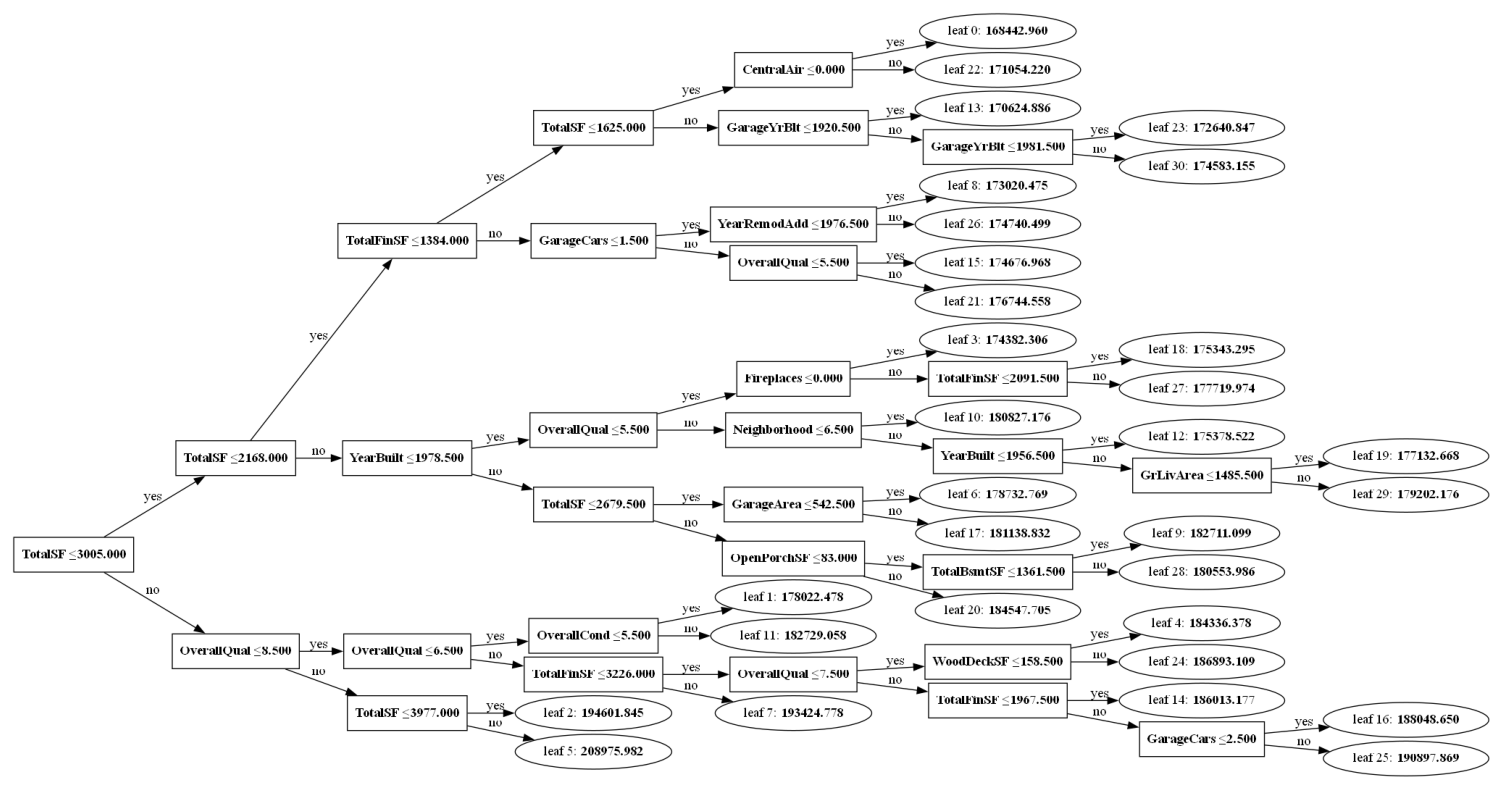

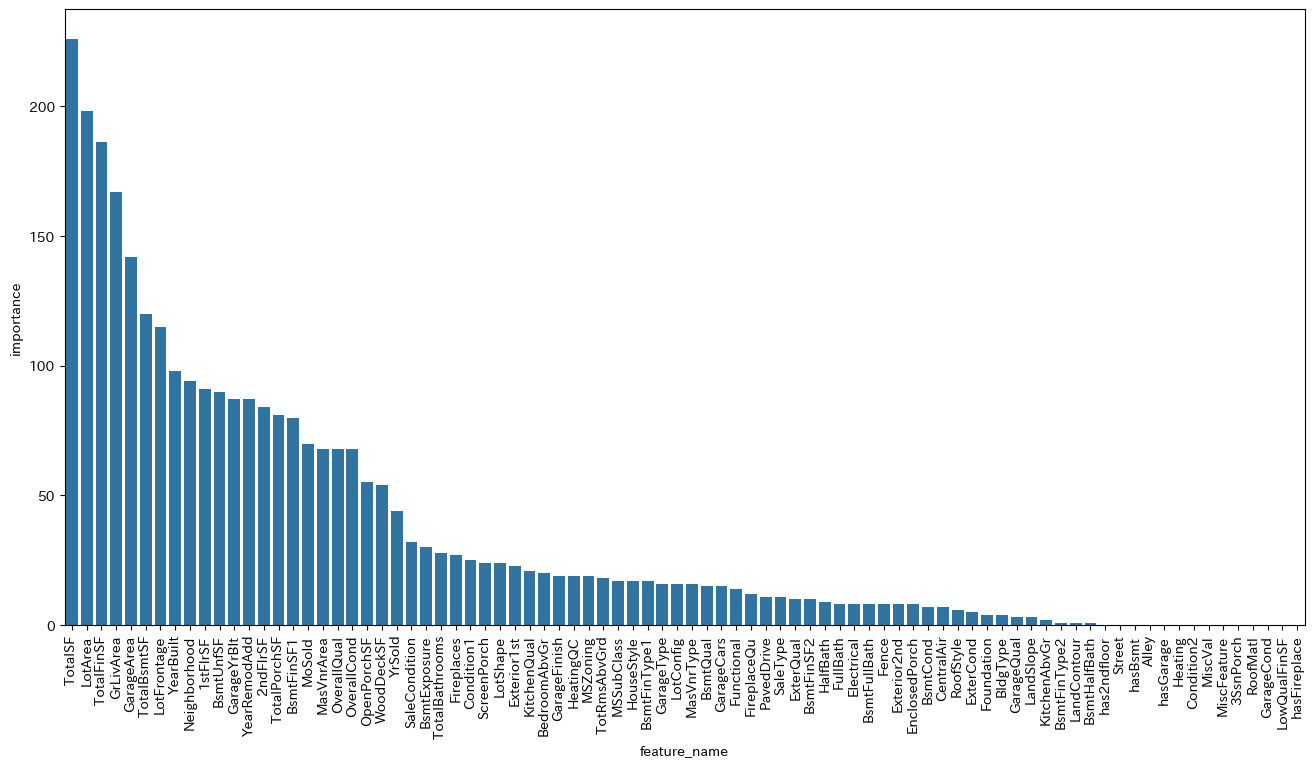

In [49]:
# 学習結果の図示(ここで表示しているのはクロスバリデーションの最後の分割時のモデルについて)
tree_idx = 0
print(f"{tree_idx + 1}番目の木の様子は以下の通り")


plot_tree(model, tree_index=tree_idx, figsize=(20, 10))

# 特徴量重要度
df_feature_importances = pd.DataFrame(
    {"feature_name": model.feature_name_, "importance": model.feature_importances_}
).sort_values("importance", ascending=False)

plt.figure(figsize=(16, 8))
sns.barplot(data=df_feature_importances, x="feature_name", y="importance")
plt.xticks(rotation=90)
plt.show()

In [50]:
# 一度このまま提出用のデータを出力
model = LGBMRegressor(max_depth=-1)
model.fit(X, y)
sub_pred = model.predict(df_test)
submission = pd.DataFrame({"Id": df_test_Id, "SalePrice": sub_pred})
submission.to_csv("train_test_submission/submission.csv", index=False)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001471 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4156
[LightGBM] [Info] Number of data points in the train set: 1458, number of used features: 82
[LightGBM] [Info] Start training from score 180932.919067
